In [1]:
import numpy as np
import pandas as pd

In [2]:
# taking only the data with segment records >= 8
alldata_new8 = pd.read_csv("/Users/smritimohta/Desktop/MLC/Final Project/alldata_new8.csv")
alldata_new8.head()

,Unnamed: 0,Segment ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,LBoro,StreetWidt,StreetWi_1,BikeLane,TRUCK_ROUT,SHAPE_Leng,geometry,datetime,DOW,day
0,0,15540,Beach St,Union Pl,Van Duzer Street,NB,01/09/2012,20.0,10.0,11.0,...,5,36.0,36.0,NaN,NaN,754.271243,LINESTRING (-74.07751770265212 40.627743132294...,2012-01-09,Monday,Weekday
1,1,15540,Beach St,Union Pl,Van Duzer Street,NB,01/10/2012,21.0,16.0,8.0,...,5,36.0,36.0,NaN,NaN,754.271243,LINESTRING (-74.07751770265212 40.627743132294...,2012-01-10,Tuesday,Weekday
2,2,15540,Beach St,Union Pl,Van Duzer Street,NB,01/11/2012,27.0,14.0,6.0,...,5,36.0,36.0,NaN,NaN,754.271243,LINESTRING (-74.07751770265212 40.627743132294...,2012-01-11,Wednesday,Weekday
3,3,15540,Beach St,Union Pl,Van Duzer Street,NB,01/12/2012,22.0,7.0,7.0,...,5,36.0,36.0,NaN,NaN,754.271243,LINESTRING (-74.07751770265212 40.627743132294...,2012-01-12,Thursday,Weekday
4,4,15540,Beach St,Union Pl,Van Duzer Street,NB,01/13/2012,31.0,17.0,7.0,...,5,36.0,36.0,NaN,NaN,754.271243,LINESTRING (-74.07751770265212 40.627743132294...,2012-01-13,Friday,Weekday


### Weekday

In [3]:
# weekday label data from clustering
label_weekday = pd.read_csv("/Users/smritimohta/Desktop/MLC/Final Project/weekday label 8.csv")
label_weekday.head()

,Unnamed: 0,Unnamed: 0.1,Segment ID,day,LBoro,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,3:00-4:00AM,4:00-5:00AM,...,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM,daily_volume,label
0,0,0,646,Weekday,5.0,28.250000,25.375000,19.000000,16.375000,26.375000,...,290.750000,225.875,183.000000,152.625000,94.875000,72.000000,43.000000,34.875000,3406.000000,0
1,1,1,1416,Weekday,5.0,37.400000,19.500000,10.400000,11.600000,30.700000,...,375.600000,401.500,360.300000,292.600000,228.200000,167.000000,108.700000,74.800000,5020.700000,0
2,3,3,1421,Weekday,5.0,53.750000,30.250000,21.750000,19.000000,25.125000,...,395.375000,410.375,366.250000,315.625000,183.625000,140.125000,87.875000,61.750000,5011.875000,0
3,4,4,1883,Weekday,5.0,37.000000,20.916667,12.916667,6.583333,24.333333,...,384.333333,375.250,363.166667,293.250000,227.500000,168.500000,115.250000,86.750000,4969.000000,0
4,6,6,2147,Weekday,5.0,52.388889,31.722222,21.333333,17.777778,34.277778,...,433.277778,440.000,417.277778,357.611111,264.888889,174.388889,120.777778,77.222222,5873.666667,0


In [4]:
label_weekday = label_weekday[['Segment ID','label']]

In [5]:
# filtering the all data file by weekday for merging with weekday labels
alldata_new8_weekday = alldata_new8[alldata_new8['day']=='Weekday']

In [6]:
alldata_new8_weekday.head()

,Unnamed: 0,Segment ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,LBoro,StreetWidt,StreetWi_1,BikeLane,TRUCK_ROUT,SHAPE_Leng,geometry,datetime,DOW,day
0,0,15540,Beach St,Union Pl,Van Duzer Street,NB,01/09/2012,20.0,10.0,11.0,...,5,36.0,36.0,NaN,NaN,754.271243,LINESTRING (-74.07751770265212 40.627743132294...,2012-01-09,Monday,Weekday
1,1,15540,Beach St,Union Pl,Van Duzer Street,NB,01/10/2012,21.0,16.0,8.0,...,5,36.0,36.0,NaN,NaN,754.271243,LINESTRING (-74.07751770265212 40.627743132294...,2012-01-10,Tuesday,Weekday
2,2,15540,Beach St,Union Pl,Van Duzer Street,NB,01/11/2012,27.0,14.0,6.0,...,5,36.0,36.0,NaN,NaN,754.271243,LINESTRING (-74.07751770265212 40.627743132294...,2012-01-11,Wednesday,Weekday
3,3,15540,Beach St,Union Pl,Van Duzer Street,NB,01/12/2012,22.0,7.0,7.0,...,5,36.0,36.0,NaN,NaN,754.271243,LINESTRING (-74.07751770265212 40.627743132294...,2012-01-12,Thursday,Weekday
4,4,15540,Beach St,Union Pl,Van Duzer Street,NB,01/13/2012,31.0,17.0,7.0,...,5,36.0,36.0,NaN,NaN,754.271243,LINESTRING (-74.07751770265212 40.627743132294...,2012-01-13,Friday,Weekday


In [7]:
# merging the datasets
alldata_weekday = alldata_new8_weekday.merge(label_weekday, left_on = 'Segment ID', right_on = 'Segment ID')
alldata_weekday.head()

,Unnamed: 0,Segment ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,StreetWidt,StreetWi_1,BikeLane,TRUCK_ROUT,SHAPE_Leng,geometry,datetime,DOW,day,label
0,0,15540,Beach St,Union Pl,Van Duzer Street,NB,01/09/2012,20.0,10.0,11.0,...,36.0,36.0,NaN,NaN,754.271243,LINESTRING (-74.07751770265212 40.627743132294...,2012-01-09,Monday,Weekday,0
1,1,15540,Beach St,Union Pl,Van Duzer Street,NB,01/10/2012,21.0,16.0,8.0,...,36.0,36.0,NaN,NaN,754.271243,LINESTRING (-74.07751770265212 40.627743132294...,2012-01-10,Tuesday,Weekday,0
2,2,15540,Beach St,Union Pl,Van Duzer Street,NB,01/11/2012,27.0,14.0,6.0,...,36.0,36.0,NaN,NaN,754.271243,LINESTRING (-74.07751770265212 40.627743132294...,2012-01-11,Wednesday,Weekday,0
3,3,15540,Beach St,Union Pl,Van Duzer Street,NB,01/12/2012,22.0,7.0,7.0,...,36.0,36.0,NaN,NaN,754.271243,LINESTRING (-74.07751770265212 40.627743132294...,2012-01-12,Thursday,Weekday,0
4,4,15540,Beach St,Union Pl,Van Duzer Street,NB,01/13/2012,31.0,17.0,7.0,...,36.0,36.0,NaN,NaN,754.271243,LINESTRING (-74.07751770265212 40.627743132294...,2012-01-13,Friday,Weekday,0


In [8]:
# fromc clustering we know that the highest traffic cluster is label 1. Lets find out which top 5 
# segments have the highest traffic in this cluster.
alldata_weekday_ht = alldata_weekday[alldata_weekday['label']==1]
alldata_weekday_ht.head(2)

,Unnamed: 0,Segment ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,StreetWidt,StreetWi_1,BikeLane,TRUCK_ROUT,SHAPE_Leng,geometry,datetime,DOW,day,label
11671,18879,154280,Gowanus Expressway,29 Street,28 Street,NB,02/04/2013,1237.0,720.0,624.0,...,34.0,34.0,NaN,3.0,249.365957,LINESTRING (-74.00182553252687 40.660060811399...,2013-02-04,Monday,Weekday,1
11672,18880,154280,Gowanus Expressway,29 Street,28 Street,NB,02/05/2013,836.0,627.0,554.0,...,34.0,34.0,NaN,3.0,249.365957,LINESTRING (-74.00182553252687 40.660060811399...,2013-02-05,Tuesday,Weekday,1


In [9]:
# grouping by segments
alldata_weekday_htg = alldata_weekday_ht[['Segment ID','LZip','LBoro','Direction','Roadway Name','From','To','12:00-1:00 AM', '1:00-2:00AM', '2:00-3:00AM',
       '3:00-4:00AM', '4:00-5:00AM', '5:00-6:00AM', '6:00-7:00AM',
       '7:00-8:00AM', '8:00-9:00AM', '9:00-10:00AM', '10:00-11:00AM',
       '11:00-12:00PM', '12:00-1:00PM', '1:00-2:00PM', '2:00-3:00PM',
       '3:00-4:00PM', '4:00-5:00PM', '5:00-6:00PM', '6:00-7:00PM',
       '7:00-8:00PM', '8:00-9:00PM', '9:00-10:00PM', '10:00-11:00PM',
       '11:00-12:00AM','daily_volume']].groupby(by=['Segment ID','Roadway Name','From','To','Direction'], as_index=False).mean()

In [10]:
# sorting by daily volume of vehicles in the segments
alldata_weekday_htg = alldata_weekday_htg.sort_values(by=['daily_volume'], ascending=False)
alldata_weekday_htg

,Segment ID,Roadway Name,From,To,Direction,LZip,LBoro,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM,daily_volume
94,193991,Long Island Expressway,73 Pl,74 Street,WB,11378.0,4,2053.4,1356.8,1219.4,...,5274.0,5282.6,5142.2,5012.6,5046.6,4997.2,4517.4,3842.2,3168.4,110044.8
51,142386,Long Island Expressway,Junction Boulevard,97 Street,EB,11374.0,4,3488.8,2309.4,1671.8,...,4971.4,5026.8,5195.6,5325.0,5318.4,5544.0,5315.6,4790.4,4265.4,105230.2
34,139303,Bronx River Parkway,Boston Road,Entrance,SB,10460.0,2,1469.8,847.2,637.0,...,6744.4,6478.2,5591.6,6541.8,5650.0,4593.0,3808.2,3180.2,2490.2,103290.0
35,139657,Bronx River Parkway,Morris Park Avenue,Bronxdale Avenue,SB,10460.0,2,1720.0,1048.8,770.2,...,6597.8,6422.2,5305.0,5810.4,5591.6,4736.0,3965.2,3308.2,2611.6,100682.0
20,137523,Long Island Expressway,57 Avenue,254 Street,WB,11362.0,4,1245.8,861.8,892.8,...,5494.4,5495.2,5076.8,5426.2,5317.6,5402.8,4447.4,3564.0,2252.8,100303.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,142827,W Shore Expressway,Muldon Avenue,Wild Avenue,NB,10309.0,5,686.8,453.2,420.4,...,2885.4,2820.2,2769.8,2654.0,2248.4,1839.4,1572.6,1324.0,979.6,52426.6
12,136049,Fdr Drive,Stanton Street,E Houston Street,NB,10002.0,1,632.2,296.8,211.2,...,2634.4,2731.8,3083.0,3201.0,2914.2,2648.0,2353.8,1942.4,1082.8,51810.6
24,137771,Clearview Expressway,39 Avenue,Boyce Avenue,SB,11360.0,4,627.2,494.0,491.0,...,3755.0,4106.6,4007.6,3700.8,2931.4,2106.2,1490.0,1106.2,876.8,51639.2
44,140481,Jackie Robinson Parkway,Woodhaven Boulevard,71 Avenue,EB,11385.0,4,957.0,538.2,402.8,...,2670.4,2829.2,2950.0,3014.6,2702.4,2547.6,2190.4,2027.4,1620.6,51442.6


In [11]:
# finding our top most segments by volume of vehicles
top_segments_weekday = alldata_weekday_htg[0:5]
top_segments_weekday

,Segment ID,Roadway Name,From,To,Direction,LZip,LBoro,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM,daily_volume
94,193991,Long Island Expressway,73 Pl,74 Street,WB,11378.0,4,2053.4,1356.8,1219.4,...,5274.0,5282.6,5142.2,5012.6,5046.6,4997.2,4517.4,3842.2,3168.4,110044.8
51,142386,Long Island Expressway,Junction Boulevard,97 Street,EB,11374.0,4,3488.8,2309.4,1671.8,...,4971.4,5026.8,5195.6,5325.0,5318.4,5544.0,5315.6,4790.4,4265.4,105230.2
34,139303,Bronx River Parkway,Boston Road,Entrance,SB,10460.0,2,1469.8,847.2,637.0,...,6744.4,6478.2,5591.6,6541.8,5650.0,4593.0,3808.2,3180.2,2490.2,103290.0
35,139657,Bronx River Parkway,Morris Park Avenue,Bronxdale Avenue,SB,10460.0,2,1720.0,1048.8,770.2,...,6597.8,6422.2,5305.0,5810.4,5591.6,4736.0,3965.2,3308.2,2611.6,100682.0
20,137523,Long Island Expressway,57 Avenue,254 Street,WB,11362.0,4,1245.8,861.8,892.8,...,5494.4,5495.2,5076.8,5426.2,5317.6,5402.8,4447.4,3564.0,2252.8,100303.8


In [92]:
topseg_weekday = np.array(top_segments_weekday['Segment ID'])
topseg_weekday

array([193991, 142386, 139303, 139657, 137523])

### Weekend

In [75]:
# repeating the same process for weekends
# reading the weekend labelled data received from clustering
label_weekend = pd.read_csv("/Users/smritimohta/Desktop/MLC/Final Project/weekend label 8.csv")
label_weekend.head()

,Unnamed: 0,Unnamed: 0.1,Segment ID,day,LBoro,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,3:00-4:00AM,4:00-5:00AM,...,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM,daily_volume,label
0,2,2,1416,Weekend,5.0,92.125,56.250,30.625,24.625,21.000,...,311.000,292.750,268.750,223.250,188.000,142.375,119.875,89.125,4417.000,0
1,5,5,1883,Weekend,5.0,96.875,64.625,31.625,22.000,14.750,...,308.375,295.625,295.625,247.750,190.625,154.250,109.125,92.250,4529.750,0
2,7,7,2147,Weekend,5.0,79.375,52.750,29.125,21.375,16.250,...,298.875,304.875,282.500,248.375,199.500,159.250,115.750,88.375,4543.375,0
3,9,9,2153,Weekend,5.0,118.000,79.125,59.750,35.875,27.750,...,325.875,317.500,307.500,268.500,224.250,168.875,147.875,123.750,4906.500,0
4,11,11,2367,Weekend,5.0,122.375,78.125,46.250,39.125,43.125,...,426.375,394.750,357.125,293.500,239.250,190.500,142.750,117.000,6274.875,0


In [77]:
label_weekend = label_weekend[['Segment ID','label']]

In [79]:
# filtering all data by weekend for merging with weekend data labels
alldata_new8_weekend = alldata_new8[alldata_new8['day']=='Weekend']

In [81]:
alldata_new8_weekend.head()

,Unnamed: 0,Segment ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,LBoro,StreetWidt,StreetWi_1,BikeLane,TRUCK_ROUT,SHAPE_Leng,geometry,datetime,DOW,day
5,5,15540,Beach St,Union Pl,Van Duzer Street,NB,01/14/2012,42.0,27.0,21.0,...,5,36.0,36.0,NaN,NaN,754.271243,LINESTRING (-74.07751770265212 40.627743132294...,2012-01-14,Saturday,Weekend
11,11,15540,Beach St,Union Pl,Van Duzer Street,SB,01/14/2012,45.0,45.0,28.0,...,5,36.0,36.0,NaN,NaN,754.271243,LINESTRING (-74.07751770265212 40.627743132294...,2012-01-14,Saturday,Weekend
12,12,15540,Beach St,Union Pl,Van Duzer Street,SB,10/08/2016,49.0,32.0,21.0,...,5,36.0,36.0,NaN,NaN,754.271243,LINESTRING (-74.07751770265212 40.627743132294...,2016-10-08,Saturday,Weekend
13,13,15540,Beach St,Union Pl,Van Duzer Street,NB,10/08/2016,33.0,34.0,31.0,...,5,36.0,36.0,NaN,NaN,754.271243,LINESTRING (-74.07751770265212 40.627743132294...,2016-10-08,Saturday,Weekend
14,14,15540,Beach St,Union Pl,Van Duzer Street,SB,10/09/2016,61.0,43.0,29.0,...,5,36.0,36.0,NaN,NaN,754.271243,LINESTRING (-74.07751770265212 40.627743132294...,2016-10-09,Sunday,Weekend


In [82]:
# merging the weekend data with labels acheieved from clustering
alldata_weekend = alldata_new8_weekend.merge(label_weekend, left_on = 'Segment ID', right_on = 'Segment ID')
alldata_weekend.head()

,Unnamed: 0,Segment ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,StreetWidt,StreetWi_1,BikeLane,TRUCK_ROUT,SHAPE_Leng,geometry,datetime,DOW,day,label
0,5,15540,Beach St,Union Pl,Van Duzer Street,NB,01/14/2012,42.0,27.0,21.0,...,36.0,36.0,NaN,NaN,754.271243,LINESTRING (-74.07751770265212 40.627743132294...,2012-01-14,Saturday,Weekend,0
1,11,15540,Beach St,Union Pl,Van Duzer Street,SB,01/14/2012,45.0,45.0,28.0,...,36.0,36.0,NaN,NaN,754.271243,LINESTRING (-74.07751770265212 40.627743132294...,2012-01-14,Saturday,Weekend,0
2,12,15540,Beach St,Union Pl,Van Duzer Street,SB,10/08/2016,49.0,32.0,21.0,...,36.0,36.0,NaN,NaN,754.271243,LINESTRING (-74.07751770265212 40.627743132294...,2016-10-08,Saturday,Weekend,0
3,13,15540,Beach St,Union Pl,Van Duzer Street,NB,10/08/2016,33.0,34.0,31.0,...,36.0,36.0,NaN,NaN,754.271243,LINESTRING (-74.07751770265212 40.627743132294...,2016-10-08,Saturday,Weekend,0
4,14,15540,Beach St,Union Pl,Van Duzer Street,SB,10/09/2016,61.0,43.0,29.0,...,36.0,36.0,NaN,NaN,754.271243,LINESTRING (-74.07751770265212 40.627743132294...,2016-10-09,Sunday,Weekend,0


In [83]:
# filtering by label 1 (highest traffic cluster)
alldata_weekend_ht = alldata_weekend[alldata_weekend['label']==1]
alldata_weekend_ht.head(2)

,Unnamed: 0,Segment ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,StreetWidt,StreetWi_1,BikeLane,TRUCK_ROUT,SHAPE_Leng,geometry,datetime,DOW,day,label
7035,18878,154280,Gowanus Expressway,29 Street,28 Street,NB,02/03/2013,1710.0,1115.0,797.0,...,34.0,34.0,NaN,3.0,249.365957,LINESTRING (-74.00182553252687 40.660060811399...,2013-02-03,Sunday,Weekend,1
7036,18883,154280,Gowanus Expressway,29 Street,28 Street,SB,02/03/2013,3256.0,2151.0,1582.0,...,34.0,34.0,NaN,3.0,249.365957,LINESTRING (-74.00182553252687 40.660060811399...,2013-02-03,Sunday,Weekend,1


In [84]:
#grouping the dataset by Segment ID
alldata_weekend_htg = alldata_weekend_ht[['Segment ID','LZip','LBoro','Direction','Roadway Name','From','To','12:00-1:00 AM', '1:00-2:00AM', '2:00-3:00AM',
       '3:00-4:00AM', '4:00-5:00AM', '5:00-6:00AM', '6:00-7:00AM',
       '7:00-8:00AM', '8:00-9:00AM', '9:00-10:00AM', '10:00-11:00AM',
       '11:00-12:00PM', '12:00-1:00PM', '1:00-2:00PM', '2:00-3:00PM',
       '3:00-4:00PM', '4:00-5:00PM', '5:00-6:00PM', '6:00-7:00PM',
       '7:00-8:00PM', '8:00-9:00PM', '9:00-10:00PM', '10:00-11:00PM',
       '11:00-12:00AM','daily_volume']].groupby(by=['Segment ID','Roadway Name','From','To','Direction'], as_index=False).mean()

In [85]:
# sorting by volume of vehicles 
alldata_weekend_htg = alldata_weekend_htg.sort_values(by=['daily_volume'], ascending=False)
alldata_weekend_htg

,Segment ID,Roadway Name,From,To,Direction,LZip,LBoro,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM,daily_volume
29,139303,Bronx River Parkway,Boston Road,Entrance,SB,10460.0,2,2707.50,1734.25,1242.25,...,6179.50,6736.75,8012.25,9050.75,8822.00,6417.00,4428.25,3853.25,3204.50,107212.50
43,142386,Long Island Expressway,Junction Boulevard,97 Street,EB,11374.0,4,4212.50,3436.25,2817.75,...,5433.00,5551.75,5387.50,5690.75,5620.75,5427.50,5025.25,4733.75,4521.50,105262.25
84,193992,Long Island Expressway,73 Pl,74 Street,EB,11378.0,4,4539.00,3723.50,3064.25,...,5397.50,5570.25,5282.50,5405.00,5389.50,5175.00,5061.75,4764.75,4591.25,103852.25
97,9012150,Grand Central Parkway,64 Avenue Pedestrian Overpass,64 Road,SB,11375.0,4,4435.75,3332.50,2714.25,...,5651.50,4884.25,4398.00,4393.75,5159.00,4827.50,4661.00,4434.75,4324.25,101376.50
83,193991,Long Island Expressway,73 Pl,74 Street,WB,11378.0,4,2866.50,1880.50,1335.25,...,5323.50,5129.75,4921.50,5051.75,4942.50,4832.25,4618.25,4214.00,3463.00,101113.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,9012909,Bruckner Expressway,Longfellow Avenue,Whittier Street,EB,10474.0,2,2121.00,1570.25,1082.25,...,3223.75,3128.75,3053.00,3187.50,3186.00,2892.50,2537.25,2125.50,1959.75,52931.75
73,154953,Cross Bronx Expressway,Noble Avenue,Rosedale Avenue,WB,10460.0,2,1458.25,1165.50,884.25,...,2740.00,2707.00,2639.50,2661.25,2604.50,2699.25,2550.75,2415.75,1945.50,52869.50
111,9012911,Bruckner Expressway,Longfellow Avenue,Whittier Street,WB,10474.0,2,1507.75,1116.75,720.00,...,3063.00,2967.00,2865.75,3057.75,2804.75,2631.00,2142.25,1929.75,1497.50,52402.00
101,9012452,Belt Parkway,134 Street,Van Wyck Expressway,EB,11430.0,4,1734.25,1211.75,887.50,...,2792.75,2885.75,2882.50,3014.50,2956.75,2931.50,2545.00,2270.25,1844.25,52255.25


In [86]:
# finding the top 5 segments by volume of vehicles during weekends
top_segments_weekend = alldata_weekend_htg[0:5]
top_segments_weekend

,Segment ID,Roadway Name,From,To,Direction,LZip,LBoro,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM,daily_volume
29,139303,Bronx River Parkway,Boston Road,Entrance,SB,10460.0,2,2707.50,1734.25,1242.25,...,6179.5,6736.75,8012.25,9050.75,8822.00,6417.00,4428.25,3853.25,3204.50,107212.50
43,142386,Long Island Expressway,Junction Boulevard,97 Street,EB,11374.0,4,4212.50,3436.25,2817.75,...,5433.0,5551.75,5387.50,5690.75,5620.75,5427.50,5025.25,4733.75,4521.50,105262.25
84,193992,Long Island Expressway,73 Pl,74 Street,EB,11378.0,4,4539.00,3723.50,3064.25,...,5397.5,5570.25,5282.50,5405.00,5389.50,5175.00,5061.75,4764.75,4591.25,103852.25
97,9012150,Grand Central Parkway,64 Avenue Pedestrian Overpass,64 Road,SB,11375.0,4,4435.75,3332.50,2714.25,...,5651.5,4884.25,4398.00,4393.75,5159.00,4827.50,4661.00,4434.75,4324.25,101376.50
83,193991,Long Island Expressway,73 Pl,74 Street,WB,11378.0,4,2866.50,1880.50,1335.25,...,5323.5,5129.75,4921.50,5051.75,4942.50,4832.25,4618.25,4214.00,3463.00,101113.00


In [91]:
topseg_weekend = np.array(top_segments_weekend['Segment ID'])
topseg_weekend

array([ 139303,  142386,  193992, 9012150,  193991])

### Lets tie these top segments back to original data so we can run HMM to predict traffic volume on the busiest roads

In [13]:
# reading the main data file
file = pd.read_csv("https://raw.githubusercontent.com/jehee1122/MLC-Final_foot-traffic-prediction/main/data/traffic_count.csv")
file.head()

,Unnamed: 0,ID,Segment ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,...,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM,daily_volume
0,0,1,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/09/2012,20.0,10.0,...,105.0,147.0,120.0,91.0,83.0,74.0,49.0,42.0,42.0,1529.0
1,1,2,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/10/2012,21.0,16.0,...,98.0,133.0,131.0,95.0,73.0,70.0,63.0,42.0,35.0,1424.0
2,2,3,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/11/2012,27.0,14.0,...,115.0,130.0,143.0,106.0,89.0,68.0,64.0,56.0,43.0,1574.0
3,3,4,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/12/2012,22.0,7.0,...,127.0,122.0,144.0,122.0,76.0,64.0,58.0,64.0,43.0,1559.0
4,4,5,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/13/2012,31.0,17.0,...,126.0,133.0,135.0,102.0,106.0,58.0,58.0,55.0,54.0,1659.0


In [14]:
file['datetime'] = pd.to_datetime(file['Date'])

In [15]:
file.head(2)

,Unnamed: 0,ID,Segment ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,...,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM,daily_volume,datetime
0,0,1,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/09/2012,20.0,10.0,...,147.0,120.0,91.0,83.0,74.0,49.0,42.0,42.0,1529.0,2012-01-09
1,1,2,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/10/2012,21.0,16.0,...,133.0,131.0,95.0,73.0,70.0,63.0,42.0,35.0,1424.0,2012-01-10


In [111]:
# checking for record counts per segment
segment_rec = file[['Segment ID','Date']].groupby(by=['Segment ID'], as_index=False).count().sort_values(by='Date',ascending=False)
segment_rec = segment_rec.rename(columns={'Date':'Count of Records'})
segment_rec


,Segment ID,Count of Records
817,77424,70
815,77328,70
170,25210,65
425,36705,64
428,36837,64
...,...,...
479,41759,2
7,1886,2
6,1885,2
5,1884,2


In [112]:
# for weekday top 5 segments, we have only 9 records per segment
weekday = segment_rec['Segment ID'].isin(topseg_weekday)
segment_rec[weekday]

,Segment ID,Count of Records
1688,193991,9
1218,139657,9
1213,139303,9
1192,137523,9
1260,142386,9


In [113]:
# for weekend top 5 segments also, we have only 9 records per segment
weekend = segment_rec['Segment ID'].isin(topseg_weekend)
segment_rec[weekend]

,Segment ID,Count of Records
1858,9012150,9
1688,193991,9
1689,193992,9
1213,139303,9
1260,142386,9


### We see that all these segments have very few records, on which we cannot run the HMM model for prediction. Therefore, lets take the segment with most no. of records available (Segment ID: 77424) and predict the volume of traffic based on hours in the segment

In [16]:
# filtering the main file with segment ID 77424
seg1 = file[file["Segment ID"]==77424]
seg1

,Unnamed: 0,ID,Segment ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,...,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM,daily_volume,datetime
7194,3801,255,77424,EAST 163 STREET,INTERVALE AVENUE,ROGERS PLACE,EB,09/30/2012,238.0,195.0,...,311.0,334.0,308.0,282.0,295.0,203.0,150.0,159.0,5208.0,2012-09-30
7195,3802,255,77424,EAST 163 STREET,INTERVALE AVENUE,ROGERS PLACE,EB,10/01/2012,111.0,84.0,...,484.0,432.0,370.0,289.0,252.0,220.0,210.0,149.0,6204.0,2012-10-01
7196,3803,255,77424,EAST 163 STREET,INTERVALE AVENUE,ROGERS PLACE,EB,10/02/2012,138.0,72.0,...,461.0,408.0,345.0,288.0,270.0,222.0,161.0,181.0,6071.0,2012-10-02
7197,3804,255,77424,EAST 163 STREET,INTERVALE AVENUE,ROGERS PLACE,EB,10/03/2012,110.0,74.0,...,466.0,434.0,368.0,286.0,243.0,252.0,206.0,180.0,6311.0,2012-10-03
7198,3805,255,77424,EAST 163 STREET,INTERVALE AVENUE,ROGERS PLACE,EB,10/04/2012,94.0,76.0,...,442.0,377.0,275.0,330.0,278.0,236.0,182.0,149.0,6172.0,2012-10-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33571,24233,185,77424,East 163 Street,Rogers Place,Intervale Avenue,WB,11/05/2019,108.0,66.0,...,407.0,415.0,368.0,305.0,273.0,242.0,199.0,176.0,6402.0,2019-11-05
33572,24234,185,77424,East 163 Street,Rogers Place,Intervale Avenue,WB,11/06/2019,101.0,67.0,...,379.0,393.0,396.0,347.0,266.0,246.0,195.0,145.0,6472.0,2019-11-06
33573,24235,185,77424,East 163 Street,Rogers Place,Intervale Avenue,WB,11/07/2019,103.0,88.0,...,404.0,374.0,430.0,396.0,294.0,217.0,183.0,182.0,6772.0,2019-11-07
33574,24236,185,77424,East 163 Street,Rogers Place,Intervale Avenue,WB,11/08/2019,106.0,83.0,...,451.0,422.0,415.0,330.0,335.0,305.0,255.0,251.0,7030.0,2019-11-08


In [17]:
import datetime 
seg1['datetime'] = seg1['datetime'].apply(datetime.datetime.toordinal)

<ipython-input-17-9db306500515>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seg1['datetime'] = seg1['datetime'].apply(datetime.datetime.toordinal)


In [18]:
seg1.head(2)

,Unnamed: 0,ID,Segment ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,...,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM,daily_volume,datetime
7194,3801,255,77424,EAST 163 STREET,INTERVALE AVENUE,ROGERS PLACE,EB,09/30/2012,238.0,195.0,...,311.0,334.0,308.0,282.0,295.0,203.0,150.0,159.0,5208.0,734776
7195,3802,255,77424,EAST 163 STREET,INTERVALE AVENUE,ROGERS PLACE,EB,10/01/2012,111.0,84.0,...,484.0,432.0,370.0,289.0,252.0,220.0,210.0,149.0,6204.0,734777


In [19]:
seg1.columns

Index(['Unnamed: 0', 'ID', 'Segment ID', 'Roadway Name', 'From', 'To',
       'Direction', 'Date', '12:00-1:00 AM', '1:00-2:00AM', '2:00-3:00AM',
       '3:00-4:00AM', '4:00-5:00AM', '5:00-6:00AM', '6:00-7:00AM',
       '7:00-8:00AM', '8:00-9:00AM', '9:00-10:00AM', '10:00-11:00AM',
       '11:00-12:00PM', '12:00-1:00PM', '1:00-2:00PM', '2:00-3:00PM',
       '3:00-4:00PM', '4:00-5:00PM', '5:00-6:00PM', '6:00-7:00PM',
       '7:00-8:00PM', '8:00-9:00PM', '9:00-10:00PM', '10:00-11:00PM',
       '11:00-12:00AM', 'daily_volume', 'datetime'],
      dtype='object')

In [20]:
# taking only few hours in the dataset for running HMM
seg1 = seg1[['datetime','7:00-8:00AM','3:00-4:00PM', '6:00-7:00PM','daily_volume']]

In [21]:
seg1

,datetime,7:00-8:00AM,3:00-4:00PM,6:00-7:00PM,daily_volume
7194,734776,112.0,345.0,308.0,5208.0
7195,734777,304.0,440.0,370.0,6204.0
7196,734778,293.0,466.0,345.0,6071.0
7197,734779,299.0,420.0,368.0,6311.0
7198,734780,311.0,462.0,275.0,6172.0
...,...,...,...,...,...
33571,737368,385.0,372.0,368.0,6402.0
33572,737369,371.0,393.0,396.0,6472.0
33573,737370,426.0,437.0,430.0,6772.0
33574,737371,439.0,407.0,415.0,7030.0


In [22]:
# preprocessing the dataframe
seg1 = list(seg1.itertuples(index=False, name=None))
seg1[0:5]

[(734776, 112.0, 345.0, 308.0, 5208.0),
 (734777, 304.0, 440.0, 370.0, 6204.0),
 (734778, 293.0, 466.0, 345.0, 6071.0),
 (734779, 299.0, 420.0, 368.0, 6311.0),
 (734780, 311.0, 462.0, 275.0, 6172.0)]

In [23]:
dates = np.array([q[0] for q in seg1], dtype=int)
morn = np.array([q[1] for q in seg1])
noon = np.array([q[2] for q in seg1])
eve = np.array([q[3] for q in seg1])
volume = np.array([q[4] for q in seg1])[1:]

In [24]:
morn_diff = np.diff(morn)
noon_diff = np.diff(noon)
eve_diff = np.diff(eve)

In [25]:
dates = dates[1:]
dates

array([734777, 734778, 734779, 734780, 734781, 734782, 734783, 734776,
       734777, 734778, 734779, 734780, 734781, 734782, 734783, 735503,
       735503, 735504, 735504, 735505, 735505, 735506, 735506, 735507,
       735507, 735508, 735508, 735509, 735509, 735510, 735510, 735511,
       735511, 736245, 736245, 736246, 736246, 736247, 736247, 736248,
       736248, 736249, 736249, 736250, 736250, 736251, 736251, 736252,
       736252, 736253, 736253, 737373, 737365, 737366, 737367, 737368,
       737369, 737370, 737371, 737372, 737373, 737365, 737366, 737367,
       737368, 737369, 737370, 737371, 737372])

In [26]:
morn = morn[1:]
noon = noon[1:]
eve = eve[1:]

In [27]:
X1 = np.column_stack([morn_diff, noon_diff, eve_diff, volume])
X1

array([[ 1.920e+02,  9.500e+01,  6.200e+01,  6.204e+03],
       [-1.100e+01,  2.600e+01, -2.500e+01,  6.071e+03],
       [ 6.000e+00, -4.600e+01,  2.300e+01,  6.311e+03],
       [ 1.200e+01,  4.200e+01, -9.300e+01,  6.172e+03],
       [ 1.600e+01,  1.300e+01,  1.190e+02,  6.892e+03],
       [-1.730e+02, -1.010e+02, -3.100e+01,  6.122e+03],
       [-5.000e+01, -1.000e+01, -8.800e+01,  4.881e+03],
       [ 2.600e+01,  4.300e+01, -2.100e+01,  5.592e+03],
       [ 6.800e+01,  6.300e+01,  1.310e+02,  6.053e+03],
       [ 2.820e+02,  4.000e+01,  3.400e+01,  7.230e+03],
       [ 4.100e+01, -1.000e+01,  1.000e+01,  7.529e+03],
       [-6.000e+00, -3.000e+00,  9.000e+00,  7.599e+03],
       [ 5.000e+00, -2.000e+00,  6.300e+01,  8.295e+03],
       [-3.470e+02, -9.900e+01, -1.010e+02,  6.589e+03],
       [-4.900e+01, -5.100e+01, -9.000e+01,  5.241e+03],
       [ 7.300e+01,  5.100e+01,  3.900e+01,  6.791e+03],
       [-3.700e+01,  1.020e+02,  1.150e+02,  7.219e+03],
       [-2.400e+01, -9.300e+01,

### Lets run HMM on Morning Hour: 7AM to 8AM to predict vehicle volume on a given day at this hour

In [115]:
import datetime
import numpy as np
import pandas as pd
from pandas_datareader import data 

from hmmlearn.hmm import GaussianHMM
# the observation probability distribution is the normal distribution

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.dates import YearLocator, MonthLocator

import warnings
warnings.filterwarnings('ignore')

In [28]:
# filtering dataset to only consider morning hour vol between 7am to 8am
X_morn = np.column_stack([morn_diff, volume])
X_morn

array([[ 1.920e+02,  6.204e+03],
       [-1.100e+01,  6.071e+03],
       [ 6.000e+00,  6.311e+03],
       [ 1.200e+01,  6.172e+03],
       [ 1.600e+01,  6.892e+03],
       [-1.730e+02,  6.122e+03],
       [-5.000e+01,  4.881e+03],
       [ 2.600e+01,  5.592e+03],
       [ 6.800e+01,  6.053e+03],
       [ 2.820e+02,  7.230e+03],
       [ 4.100e+01,  7.529e+03],
       [-6.000e+00,  7.599e+03],
       [ 5.000e+00,  8.295e+03],
       [-3.470e+02,  6.589e+03],
       [-4.900e+01,  5.241e+03],
       [ 7.300e+01,  6.791e+03],
       [-3.700e+01,  7.219e+03],
       [-2.400e+01,  5.710e+03],
       [-7.000e+00,  5.707e+03],
       [ 2.690e+02,  6.771e+03],
       [ 1.390e+02,  7.019e+03],
       [-1.220e+02,  6.453e+03],
       [ 7.800e+01,  7.253e+03],
       [-1.020e+02,  6.930e+03],
       [ 1.630e+02,  7.575e+03],
       [-1.420e+02,  6.990e+03],
       [ 1.230e+02,  7.445e+03],
       [-1.240e+02,  7.537e+03],
       [ 1.160e+02,  8.138e+03],
       [-3.720e+02,  6.129e+03],
       [ 5

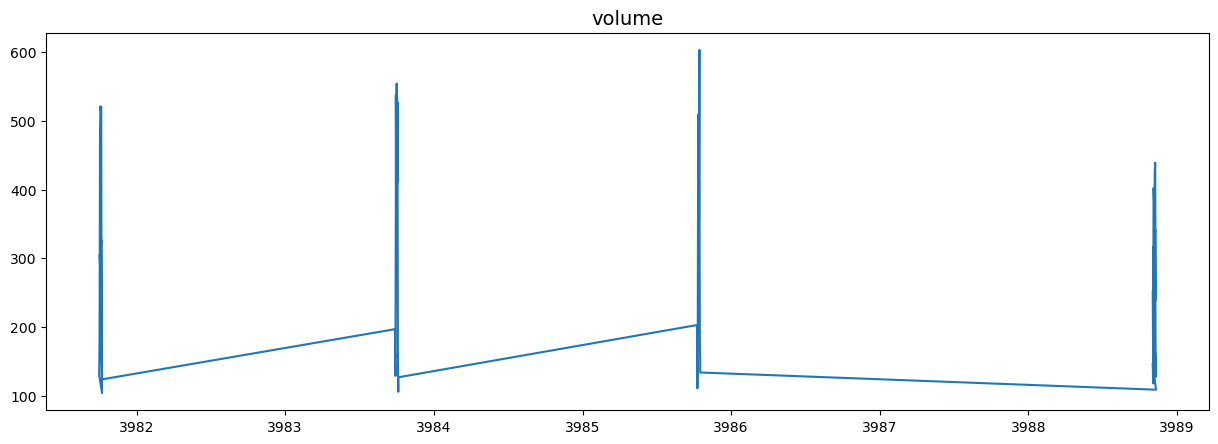

In [30]:
plt.figure(figsize=(15, 5), dpi=100) 
plt.title("volume", fontsize = 14)
plt.gca().xaxis.set_major_locator(YearLocator())
plt.plot_date(dates,morn,"-")
plt.show()

In [31]:
# fitting the HMM model
model = GaussianHMM(n_components=4, covariance_type="diag", n_iter=1000)
model.fit(X_morn)

GaussianHMM(n_components=4, n_iter=1000)

In [32]:
hidden_states = model.predict(X_morn)

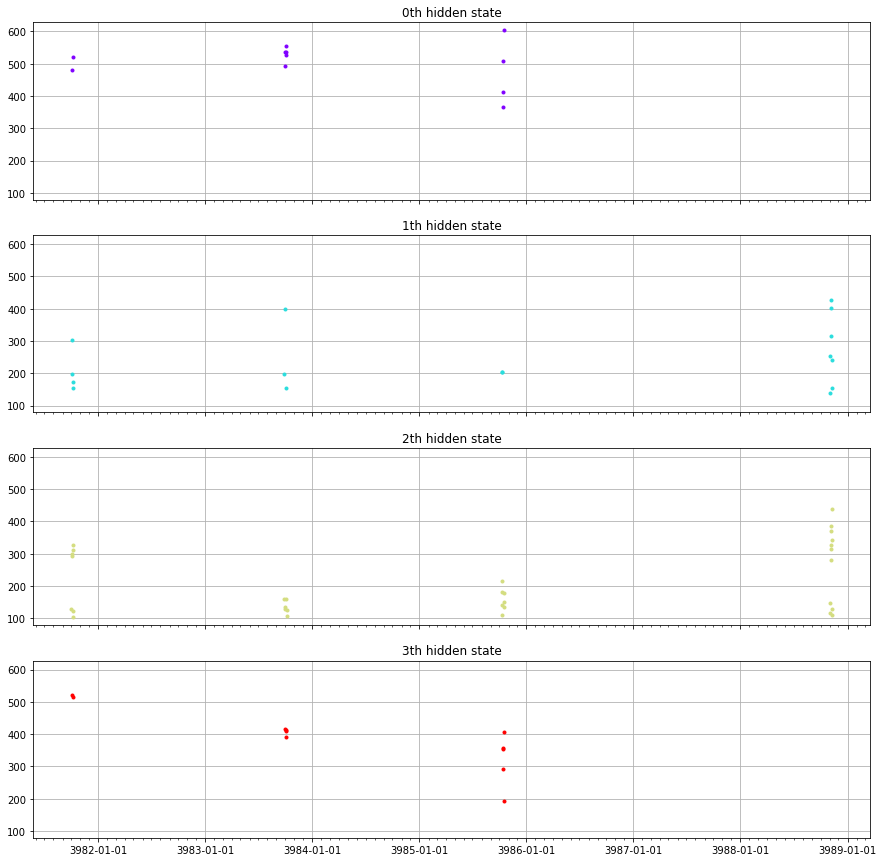

In [33]:
# From HMMLearn Documentation.....

fig, axs = plt.subplots(model.n_components, sharex=True, sharey=True, figsize=(15,15))
colours = cm.rainbow(np.linspace(0, 1, model.n_components))

for i, (ax, colour) in enumerate(zip(axs, colours)):
    # Use fancy indexing to plot data in each state.
    mask = hidden_states == i
    ax.plot_date(dates[mask], morn[mask], ".", c=colour)
    ax.set_title("{0}th hidden state".format(i))

    # Format the ticks.
    ax.xaxis.set_major_locator(YearLocator())
    ax.xaxis.set_minor_locator(MonthLocator())

    ax.grid(True)
plt.show()

In [34]:
expected_returns_and_volumes = np.dot(model.transmat_, model.means_)
returns_and_volume_columnwise = list(zip(*expected_returns_and_volumes))
expected_returns = returns_and_volume_columnwise[0]
expected_volumes = returns_and_volume_columnwise[1]
params = pd.concat([pd.Series(expected_returns), pd.Series(expected_volumes)], axis=1)
params.columns= ['Returns', 'Volume']
print (params)

     Returns       Volume
0 -81.292840  6993.615556
1  11.620256  6225.577507
2   2.282523  6178.547337
3  72.257507  7352.664514


In [35]:
lastN = 7
start_date = datetime.date.today() - datetime.timedelta(days=lastN*2) 

dates = np.array([q[0] for q in seg1], dtype=int)

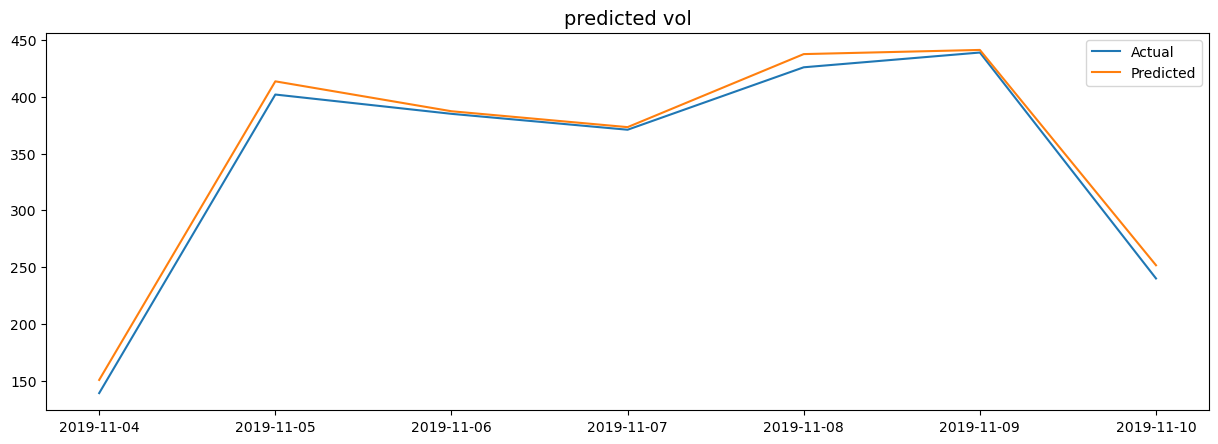

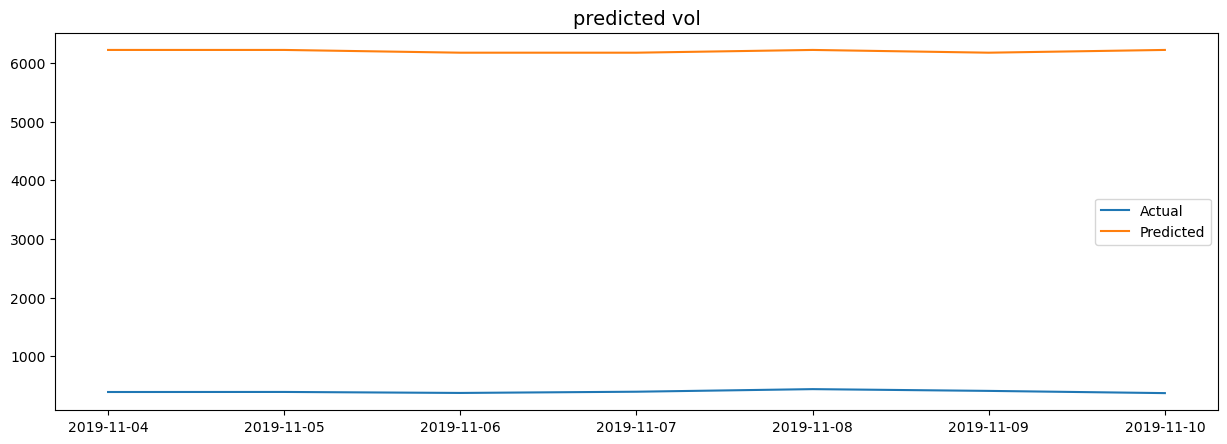

In [36]:
predicted_hourvol = []
predicted_dates = []
predicted_volumes = []
actual_volumes = []

for idx in range(lastN):
    state = hidden_states[-lastN+idx]
    current_hourvol = seg1[-lastN+idx][1]
    volume = seg1[-lastN+idx][2]
    actual_volumes.append(volume)
    current_date = datetime.date.fromordinal(dates[-lastN+idx])
    predicted_date = current_date + datetime.timedelta(days=1)
    predicted_dates.append(predicted_date)
    predicted_hourvol.append(current_hourvol + expected_returns[state])
    predicted_volumes.append(np.round(expected_volumes[state]))    

#Returns
plt.figure(figsize=(15, 5), dpi=100) 
plt.title("predicted vol", fontsize = 14)
plt.plot(predicted_dates,morn[-lastN:])
plt.plot(predicted_dates,predicted_hourvol)
plt.legend(['Actual','Predicted'])
plt.show()

#Volumes
plt.figure(figsize=(15, 5), dpi=100) 
plt.title("predicted vol", fontsize = 14)
plt.plot(predicted_dates,actual_volumes)
plt.plot(predicted_dates,predicted_volumes)
plt.legend(['Actual','Predicted'])
plt.show()

In [37]:
print('Actual:',morn[-lastN:], '\n','Prediction:', predicted_hourvol )

Actual: [139. 402. 385. 371. 426. 439. 240.] 
 Prediction: [150.6202556858385, 413.62025568583846, 387.2825234929678, 373.2825234929678, 437.62025568583846, 441.2825234929678, 251.6202556858385]


### Afternoon peak hour: 3PM to 4PM

In [57]:
# filtering the data to consider hourly volume details between 3pm and 4pm
X_noon = X1[:,1:4:2]
X_noon

array([[ 9.500e+01,  6.204e+03],
       [ 2.600e+01,  6.071e+03],
       [-4.600e+01,  6.311e+03],
       [ 4.200e+01,  6.172e+03],
       [ 1.300e+01,  6.892e+03],
       [-1.010e+02,  6.122e+03],
       [-1.000e+01,  4.881e+03],
       [ 4.300e+01,  5.592e+03],
       [ 6.300e+01,  6.053e+03],
       [ 4.000e+01,  7.230e+03],
       [-1.000e+01,  7.529e+03],
       [-3.000e+00,  7.599e+03],
       [-2.000e+00,  8.295e+03],
       [-9.900e+01,  6.589e+03],
       [-5.100e+01,  5.241e+03],
       [ 5.100e+01,  6.791e+03],
       [ 1.020e+02,  7.219e+03],
       [-9.300e+01,  5.710e+03],
       [-5.400e+01,  5.707e+03],
       [ 1.190e+02,  6.771e+03],
       [-9.000e+00,  7.019e+03],
       [-5.000e+00,  6.453e+03],
       [-8.000e+00,  7.253e+03],
       [ 4.600e+01,  6.930e+03],
       [ 1.700e+01,  7.575e+03],
       [-2.500e+01,  6.990e+03],
       [-4.000e+01,  7.445e+03],
       [ 6.400e+01,  7.537e+03],
       [-2.200e+01,  8.138e+03],
       [-1.220e+02,  6.129e+03],
       [ 8

In [59]:
# fitting the HMM model
model = GaussianHMM(n_components=4, covariance_type="diag", n_iter=1000)
model.fit(X_noon)

GaussianHMM(n_components=4, n_iter=1000)

In [60]:
hidden_states = model.predict(X_noon)

In [62]:
expected_returns_and_volumes = np.dot(model.transmat_, model.means_)
returns_and_volume_columnwise = list(zip(*expected_returns_and_volumes))
expected_returns = returns_and_volume_columnwise[0]
expected_volumes = returns_and_volume_columnwise[1]
params = pd.concat([pd.Series(expected_returns), pd.Series(expected_volumes)], axis=1)
params.columns= ['Returns', 'Volume']
print (params)

     Returns       Volume
0   1.702944  5818.735756
1   3.945812  7036.378028
2   7.265144  6105.498164
3 -22.423419  7298.294715


In [63]:
lastN = 7
start_date = datetime.date.today() - datetime.timedelta(days=lastN*2) 

dates = np.array([q[0] for q in seg1], dtype=int)

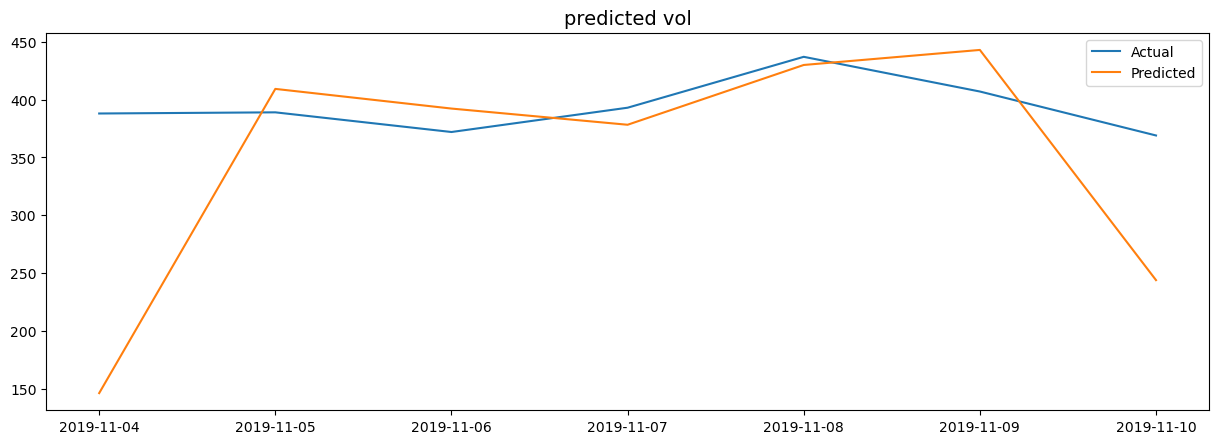

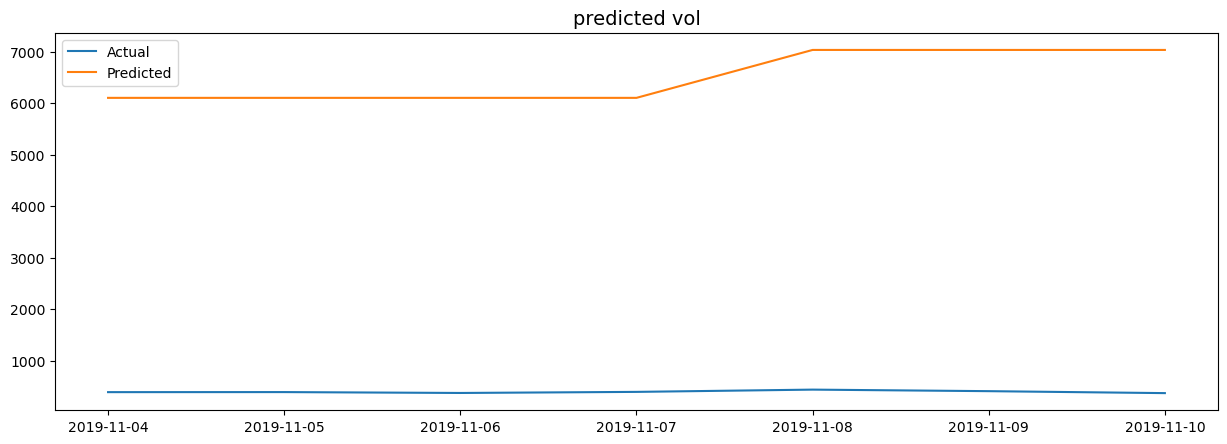

In [64]:
predicted_hourvol = []
predicted_dates = []
predicted_volumes = []
actual_volumes = []

for idx in range(lastN):
    state = hidden_states[-lastN+idx]
    current_hourvol = seg1[-lastN+idx][1]
    volume = seg1[-lastN+idx][2]
    actual_volumes.append(volume)
    current_date = datetime.date.fromordinal(dates[-lastN+idx])
    predicted_date = current_date + datetime.timedelta(days=1)
    predicted_dates.append(predicted_date)
    predicted_hourvol.append(current_hourvol + expected_returns[state])
    predicted_volumes.append(np.round(expected_volumes[state]))    

#Returns
plt.figure(figsize=(15, 5), dpi=100) 
plt.title("predicted vol", fontsize = 14)
plt.plot(predicted_dates,noon[-lastN:])
plt.plot(predicted_dates,predicted_hourvol)
plt.legend(['Actual','Predicted'])
plt.show()

#Volumes
plt.figure(figsize=(15, 5), dpi=100) 
plt.title("predicted vol", fontsize = 14)
plt.plot(predicted_dates,actual_volumes)
plt.plot(predicted_dates,predicted_volumes)
plt.legend(['Actual','Predicted'])
plt.show()

In [65]:
print('Actual:',noon[-lastN:], '\n','Prediction:', predicted_hourvol )

Actual: [388. 389. 372. 393. 437. 407. 369.] 
 Prediction: [146.2651436117964, 409.26514361179636, 392.26514361179636, 378.26514361179636, 429.94581220015397, 442.94581220015397, 243.94581220015397]


### Evening Peak Hour: 6PM to 7PM

In [68]:
# filtering the data to only consider evening hourly volume between 6pm and 7pm
X_eve = X1[:,2:4]
X_eve

array([[ 6.200e+01,  6.204e+03],
       [-2.500e+01,  6.071e+03],
       [ 2.300e+01,  6.311e+03],
       [-9.300e+01,  6.172e+03],
       [ 1.190e+02,  6.892e+03],
       [-3.100e+01,  6.122e+03],
       [-8.800e+01,  4.881e+03],
       [-2.100e+01,  5.592e+03],
       [ 1.310e+02,  6.053e+03],
       [ 3.400e+01,  7.230e+03],
       [ 1.000e+01,  7.529e+03],
       [ 9.000e+00,  7.599e+03],
       [ 6.300e+01,  8.295e+03],
       [-1.010e+02,  6.589e+03],
       [-9.000e+01,  5.241e+03],
       [ 3.900e+01,  6.791e+03],
       [ 1.150e+02,  7.219e+03],
       [-1.110e+02,  5.710e+03],
       [-7.000e+00,  5.707e+03],
       [ 3.000e+01,  6.771e+03],
       [ 9.000e+00,  7.019e+03],
       [ 1.400e+01,  6.453e+03],
       [ 1.300e+01,  7.253e+03],
       [ 7.000e+01,  6.930e+03],
       [ 1.300e+01,  7.575e+03],
       [-8.700e+01,  6.990e+03],
       [ 6.900e+01,  7.445e+03],
       [-3.900e+01,  7.537e+03],
       [ 1.900e+01,  8.138e+03],
       [-6.100e+01,  6.129e+03],
       [ 4

In [69]:
# fitting the model
model = GaussianHMM(n_components=4, covariance_type="diag", n_iter=1000)
model.fit(X_eve)

GaussianHMM(n_components=4, n_iter=1000)

In [70]:
hidden_states = model.predict(X_eve)

In [71]:
expected_returns_and_volumes = np.dot(model.transmat_, model.means_)
returns_and_volume_columnwise = list(zip(*expected_returns_and_volumes))
expected_returns = returns_and_volume_columnwise[0]
expected_volumes = returns_and_volume_columnwise[1]
params = pd.concat([pd.Series(expected_returns), pd.Series(expected_volumes)], axis=1)
params.columns= ['Returns', 'Volume']
print (params)

     Returns       Volume
0 -28.729520  6146.613554
1 -33.305083  6269.378491
2   3.507298  7218.343078
3  24.349538  6202.059640


In [72]:
lastN = 7
start_date = datetime.date.today() - datetime.timedelta(days=lastN*2) 

dates = np.array([q[0] for q in seg1], dtype=int)

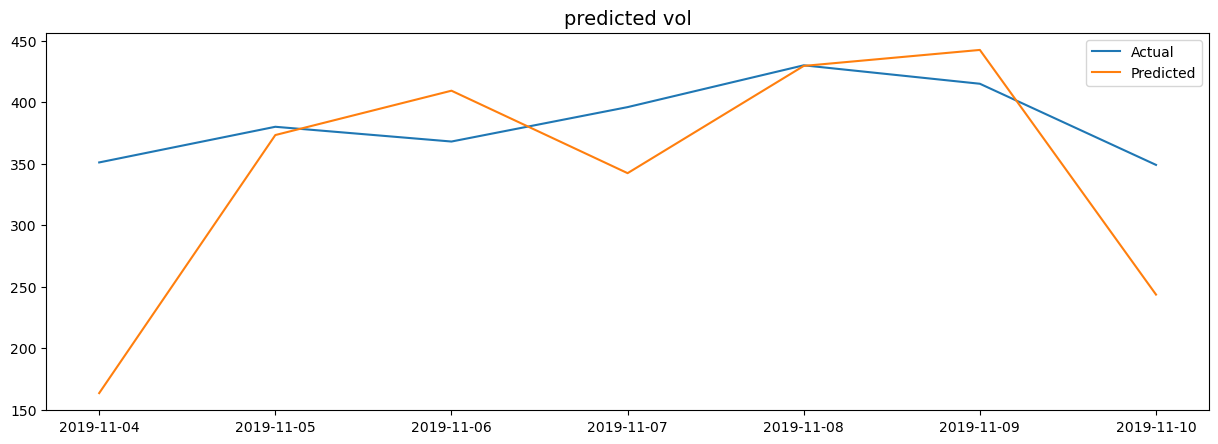

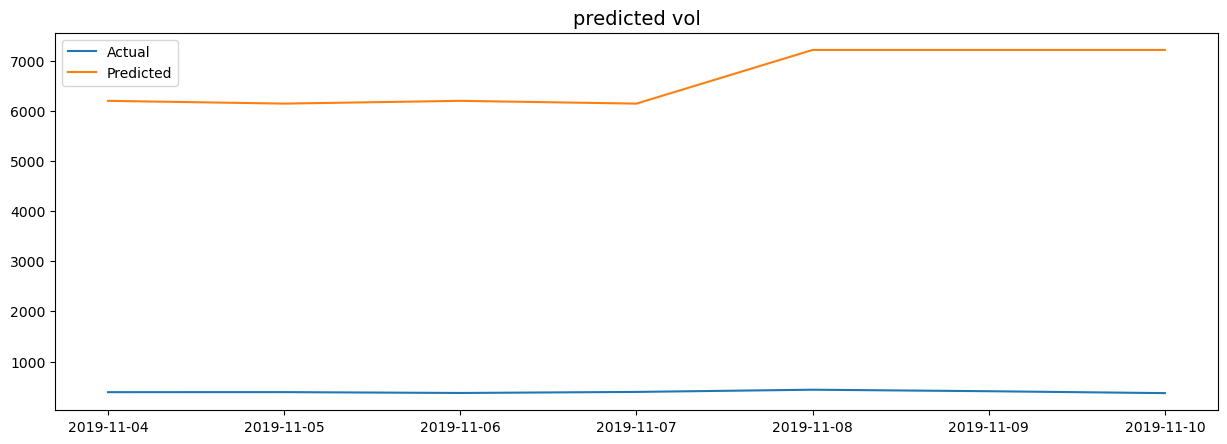

In [73]:
predicted_hourvol = []
predicted_dates = []
predicted_volumes = []
actual_volumes = []

for idx in range(lastN):
    state = hidden_states[-lastN+idx]
    current_hourvol = seg1[-lastN+idx][1]
    volume = seg1[-lastN+idx][2]
    actual_volumes.append(volume)
    current_date = datetime.date.fromordinal(dates[-lastN+idx])
    predicted_date = current_date + datetime.timedelta(days=1)
    predicted_dates.append(predicted_date)
    predicted_hourvol.append(current_hourvol + expected_returns[state])
    predicted_volumes.append(np.round(expected_volumes[state]))    

#Returns
plt.figure(figsize=(15, 5), dpi=100) 
plt.title("predicted vol", fontsize = 14)
plt.plot(predicted_dates,eve[-lastN:])
plt.plot(predicted_dates,predicted_hourvol)
plt.legend(['Actual','Predicted'])
plt.show()

#Volumes
plt.figure(figsize=(15, 5), dpi=100) 
plt.title("predicted vol", fontsize = 14)
plt.plot(predicted_dates,actual_volumes)
plt.plot(predicted_dates,predicted_volumes)
plt.legend(['Actual','Predicted'])
plt.show()

In [74]:
print('Actual:',eve[-lastN:], '\n','Prediction:', predicted_hourvol )

Actual: [351. 380. 368. 396. 430. 415. 349.] 
 Prediction: [163.34953819058546, 373.2704797765487, 409.34953819058546, 342.2704797765487, 429.5072978183504, 442.5072978183504, 243.5072978183504]
